<a href="http://www.stfc.ac.uk/"> <img src="../img/STFCLargeColour.jpg" width="50%" align="left"/></a>
<a href="https://www.addopt.org/"><img src="../img/ADDoPT-logo-MAIN-with-text.png" width="300" height="200" align="right"/></a>


# Cross Entropy and Area Under Curve

We have previously seen how to assess the quality of a [classifier with a given cutoff](ClassifierPerformance.ipynb) and how to read [curves](PrecisionRecall.ipynb) that indicate the range of results for different choices of the cutoff.

Now we look at some summary statistics that indicate the quality of these curves. The output of the classifier is assumed to be a score between 0 and 1, which is intended to represent the probability that this instance is in the positive set.


In [12]:
#import statements
import sys, random
sys.path.append("../lib/")
#import models
import sklearn, pandas

models.hideAnswers

## Make a set of models

In [18]:
y_score = [i/100 for i in range(0, 100)]
noise = [ random.gauss(0, 0.5) for i in range(0, 100) ]

def get_ys(sigma, # noise contribution
           gamma  # positive values mean stronger predictor
          ):
    return [ 0 < y_score[i]**gamma + sigma*noise[i]  for i in range(0, 100) ]


/home/vagrant/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


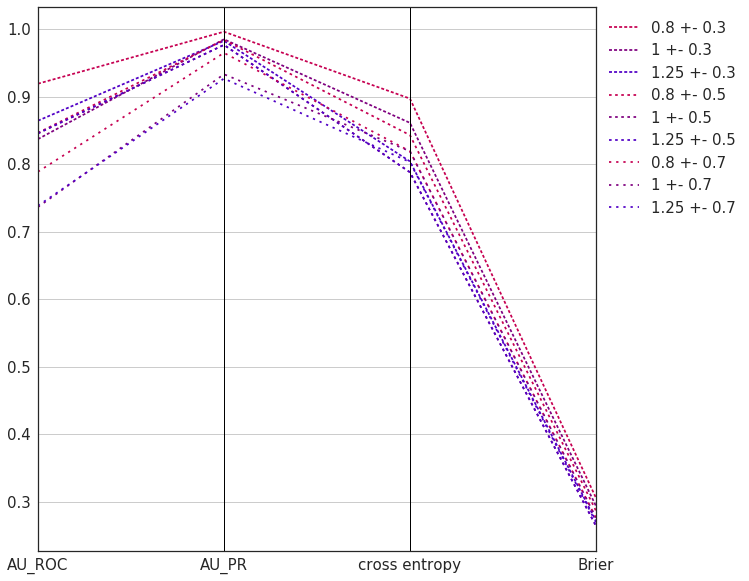

In [53]:
from sklearn import metrics 
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates

SCORES = {    
    'AU_ROC':'roc_auc_score',
    'AU_PR':'average_precision_score',
    'cross entropy':'log_loss',
    'Brier':'brier_score_loss'
}


def score(name, y_true, y_pred): 
    ret = {'name':name} 
    for score in list(SCORES.keys()):
        ret[score] = metrics.__dict__.get(SCORES[score])(y_true, y_pred)
    return ret


def show():
    for sigma in [0.3, 0.5, 0.7]: # try different noise levels
        for gamma in [0.8, 1, 1.25]: # try different levels of separation of scores
            y_true = get_ys(sigma, gamma)            
            data = [] #columns are label, scores (accuracy, f1, mcc, p ,r)
            data.append(score('{} +- {}'.format(gamma, sigma), y_true, y_score ) )
            df = pandas.DataFrame(columns=['name']+list(SCORES.keys()), data = data) 
            color = '#{:02X}00{:02X}'.format( int(127/gamma**2) , int(127*gamma**2) ) # red for poor, blue for good
            dashes = [2-sigma, 4*sigma] # dashes show noise level
            parallel_coordinates(df, 'name', 
                                 color=color, 
                                 dashes=dashes
                                )

fig, ax = plt.subplots()
fig.set_figheight(10)
fig.set_figwidth(10)
show()
plt.legend(bbox_to_anchor=(1,1))
fig.show()

Neural net models are usually trained with the Cross Entropy loss. Accuracy measures the number of correct predictions. Cross Entropy also rewards confident predictions (low scores for true negatives, high scores for true positives).

The graph above shows that this measure produces a good dispersion, and also that AU_PR is a complementary measure, capturing other aspects of the quality.

## ROC curves
For comparison, here are the Receiver Operating Characteristic Curves for these models.

/home/vagrant/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


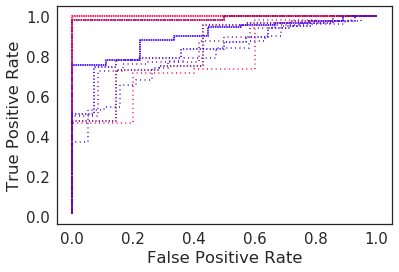

In [54]:
fig = plt.figure()
for sigma in [0.1, 0.3, 0.5]: # try different noise levels
        for gamma in [0.5, 1, 2]: # try different levels of separation of scores
            y_true = get_ys(sigma, gamma)     
            fpr, tpr, _ = metrics.roc_curve(y_true, y_score, pos_label=True, drop_intermediate=False)
            color = '#{:02X}00{:02X}'.format( int(127/gamma) , int(127*gamma) ) # red for poor, blue for good
            dashes = [1-sigma, 4*sigma] # dashes show noise level
            plt.plot(fpr, tpr, color=color, dashes=dashes)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
fig.show()

## PR curves
Here are the Precision Recall curves.

/home/vagrant/miniconda3/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


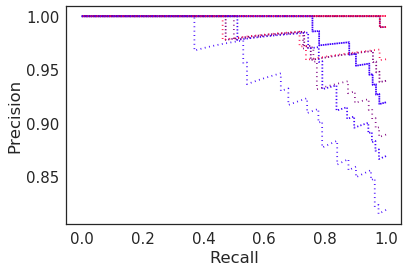

In [55]:
fig = plt.figure()
for sigma in [0.1, 0.3, 0.5]: # try different noise levels
        for gamma in [0.5, 1, 2]: # try different levels of separation of scores
            y_true = get_ys(sigma, gamma)     
            zprecision, xrecall, thresholds_pr = metrics.precision_recall_curve(y_true, y_score, pos_label=True)
            color = '#{:02X}00{:02X}'.format( int(127/gamma) , int(127*gamma) ) # red for poor, blue for good
            dashes = [1-sigma, 4*sigma] # dashes show noise level
            plt.plot(xrecall, zprecision, color=color, dashes=dashes)
plt.ylabel("Precision")
plt.xlabel("Recall")
fig.show()


[Up](../Welcome.ipynb)<br> [Back](PrecisionRecall.ipynb) [Next](ClassifierQuality.ipynb)

---------------------------------------------------
Copyright STFC 2018